# GAC Confrontation Analysis

In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

df = pd.read_excel("../data/brasil.xlsx", sheet_name="Confronto_operações")
df = df.dropna(subset=['yearmo', 'Confronto_GAC'])
df = df.fillna(0)

# Convert date to standard date format
df['yearmo'] = pd.to_datetime(df['yearmo'].str.replace('m', '-'), format='%Y-%m').dt.strftime('%b %Y')
df[['event', 'event_date']] = df['datas_importantes'].str.extract(r'(.+?)\s+(\d{4}m\d{1,2})')
df['event_date'] = pd.to_datetime(df['event_date'].str.replace('m', '-'), format='%Y-%m').dt.strftime('%b %Y')

df.describe()

,Confronto_GAC,Morte_GAC,feridos_GAC,carcere_privado_GAC,invasão_domicilio_GAC,Operações_policiais,Morte_policial,feridos_polícia,invasão_domicilio,carcere_privado_policia,...,Unnamed: 26,Unnamed: 27,Unnamed: 28,den_tiroteio,area1_operacao,area2_operacao,area3_operacao,area4_operacao,area5_operacao,den_operacao
count,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,...,72.0,72.0,72.0,72.0,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000
mean,1.972222,1.027778,0.888889,0.069444,0.041667,1.847222,1.458333,1.527778,1.416667,0.680556,...,0.0,0.0,0.0,0.0,0.708333,0.208333,0.180556,0.083333,0.111111,1.291667
std,2.055376,1.500913,1.379483,0.422147,0.201229,1.866380,2.325229,2.494909,2.330145,2.658107,...,0.0,0.0,0.0,0.0,1.486441,0.472855,0.484300,0.278325,0.395594,2.044832
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,3.000000,2.000000,1.000000,0.000000,0.000000,3.000000,2.000000,2.000000,2.250000,0.000000,...,0.0,0.0,0.0,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,9.000000,7.000000,3.000000,1.000000,8.000000,9.000000,10.000000,10.000000,21.000000,...,0.0,0.0,0.0,0.0,9.000000,2.000000,3.000000,1.000000,2.000000,12.000000


### Descriptive Stats of Data

## GAC Confrontos, Feridos, Morte Bar Graph with Two Line Plots

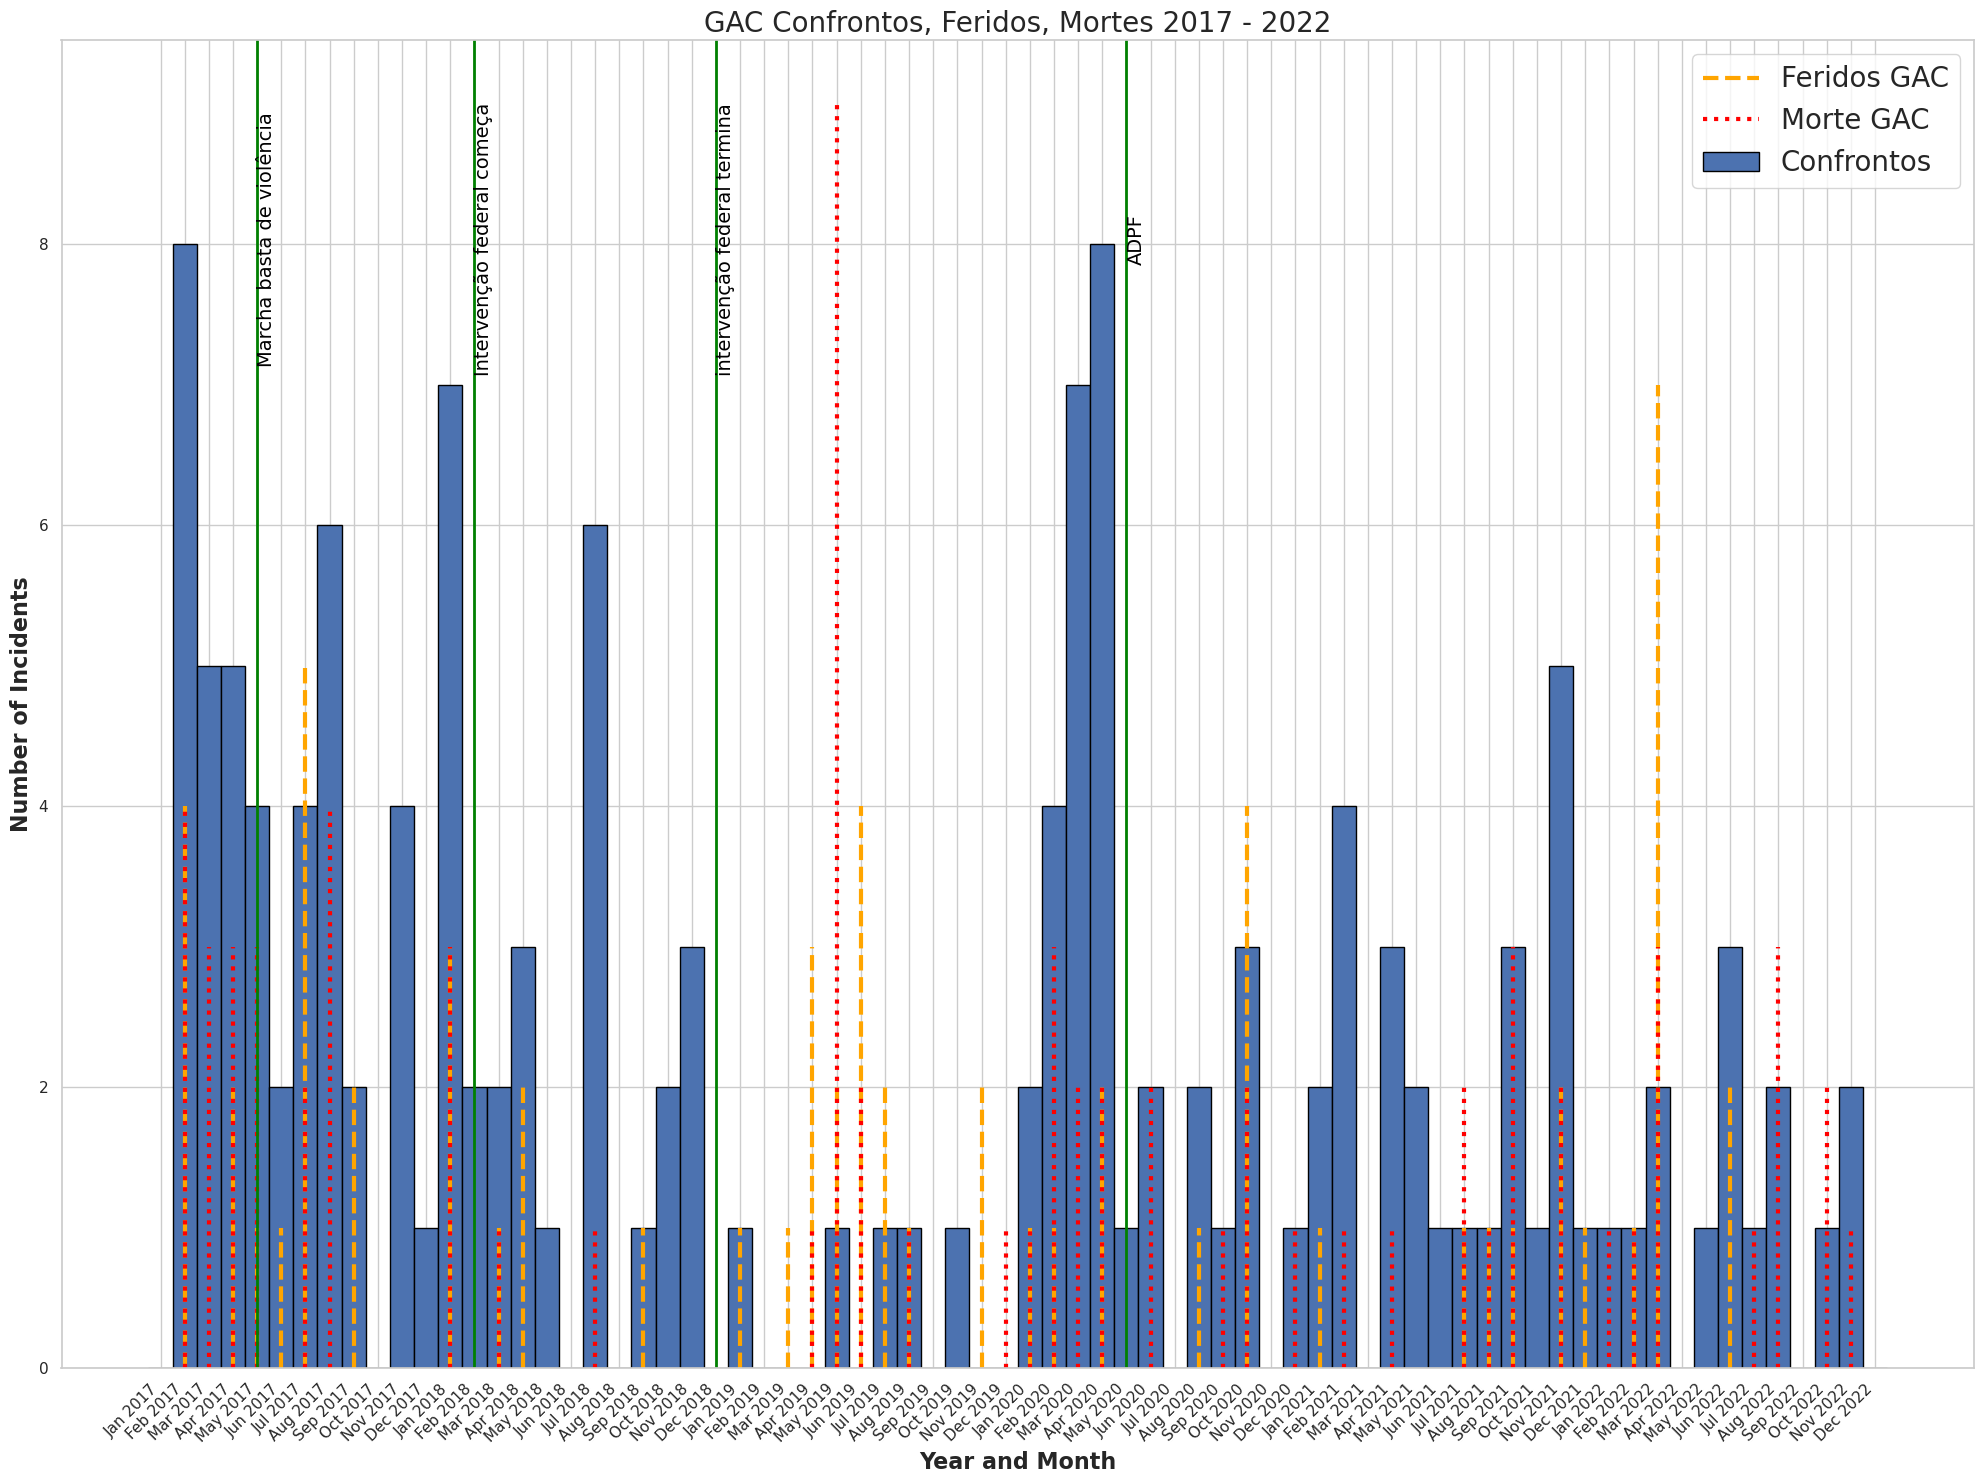

In [37]:
import seaborn as sns

width=1

x = df['yearmo']
y = df['Confronto_GAC']
z = df['feridos_GAC']
k = df['Morte_GAC']

sns.set(style="whitegrid")
sns.color_palette()

fig, ax = plt.subplots(figsize=(20, 15))

ax.bar(x, y, color='b', width=width, edgecolor='black', label='Confrontos', align='center')

for date, value in zip(x, z):
    ax.vlines(x=date, ymin=0, ymax=value, colors='orange', linestyle='--', linestyles='dotted', label='Feridos GAC' if date == x.iloc[0] else "", linewidth=3)

for date, value in zip(x, k):
    ax.vlines(x=date, ymin=0, ymax=value, colors='red', linestyles='dotted', label='Morte GAC' if date == x.iloc[0] else "", linewidth=3)
    
for _, row in df.iterrows():
    if pd.isnull(row['event']) or pd.isnull(row['event_date']):
        continue
    plt.axvline(row['event_date'], color='green', linestyle='-', linewidth=2)
    plt.text(
        row['event_date'],
        plt.gca().get_ylim()[1] * 0.85,
        row['event'],
        rotation=90,
        verticalalignment='center',
        fontsize=14,
        color='black'
    )

ax.set_xticks(x)
plt.xticks(rotation=45, ha='right')

plt.xlabel('Year and Month', fontweight='bold', fontsize=16)
plt.ylabel('Number of Incidents', fontweight='bold', fontsize=16)
plt.title('GAC Confrontos, Feridos, Mortes 2017 - 2022', fontsize=20)

plt.legend(fontsize=20)
plt.tight_layout()

### GAC Confronto Line Graph with Two Bar

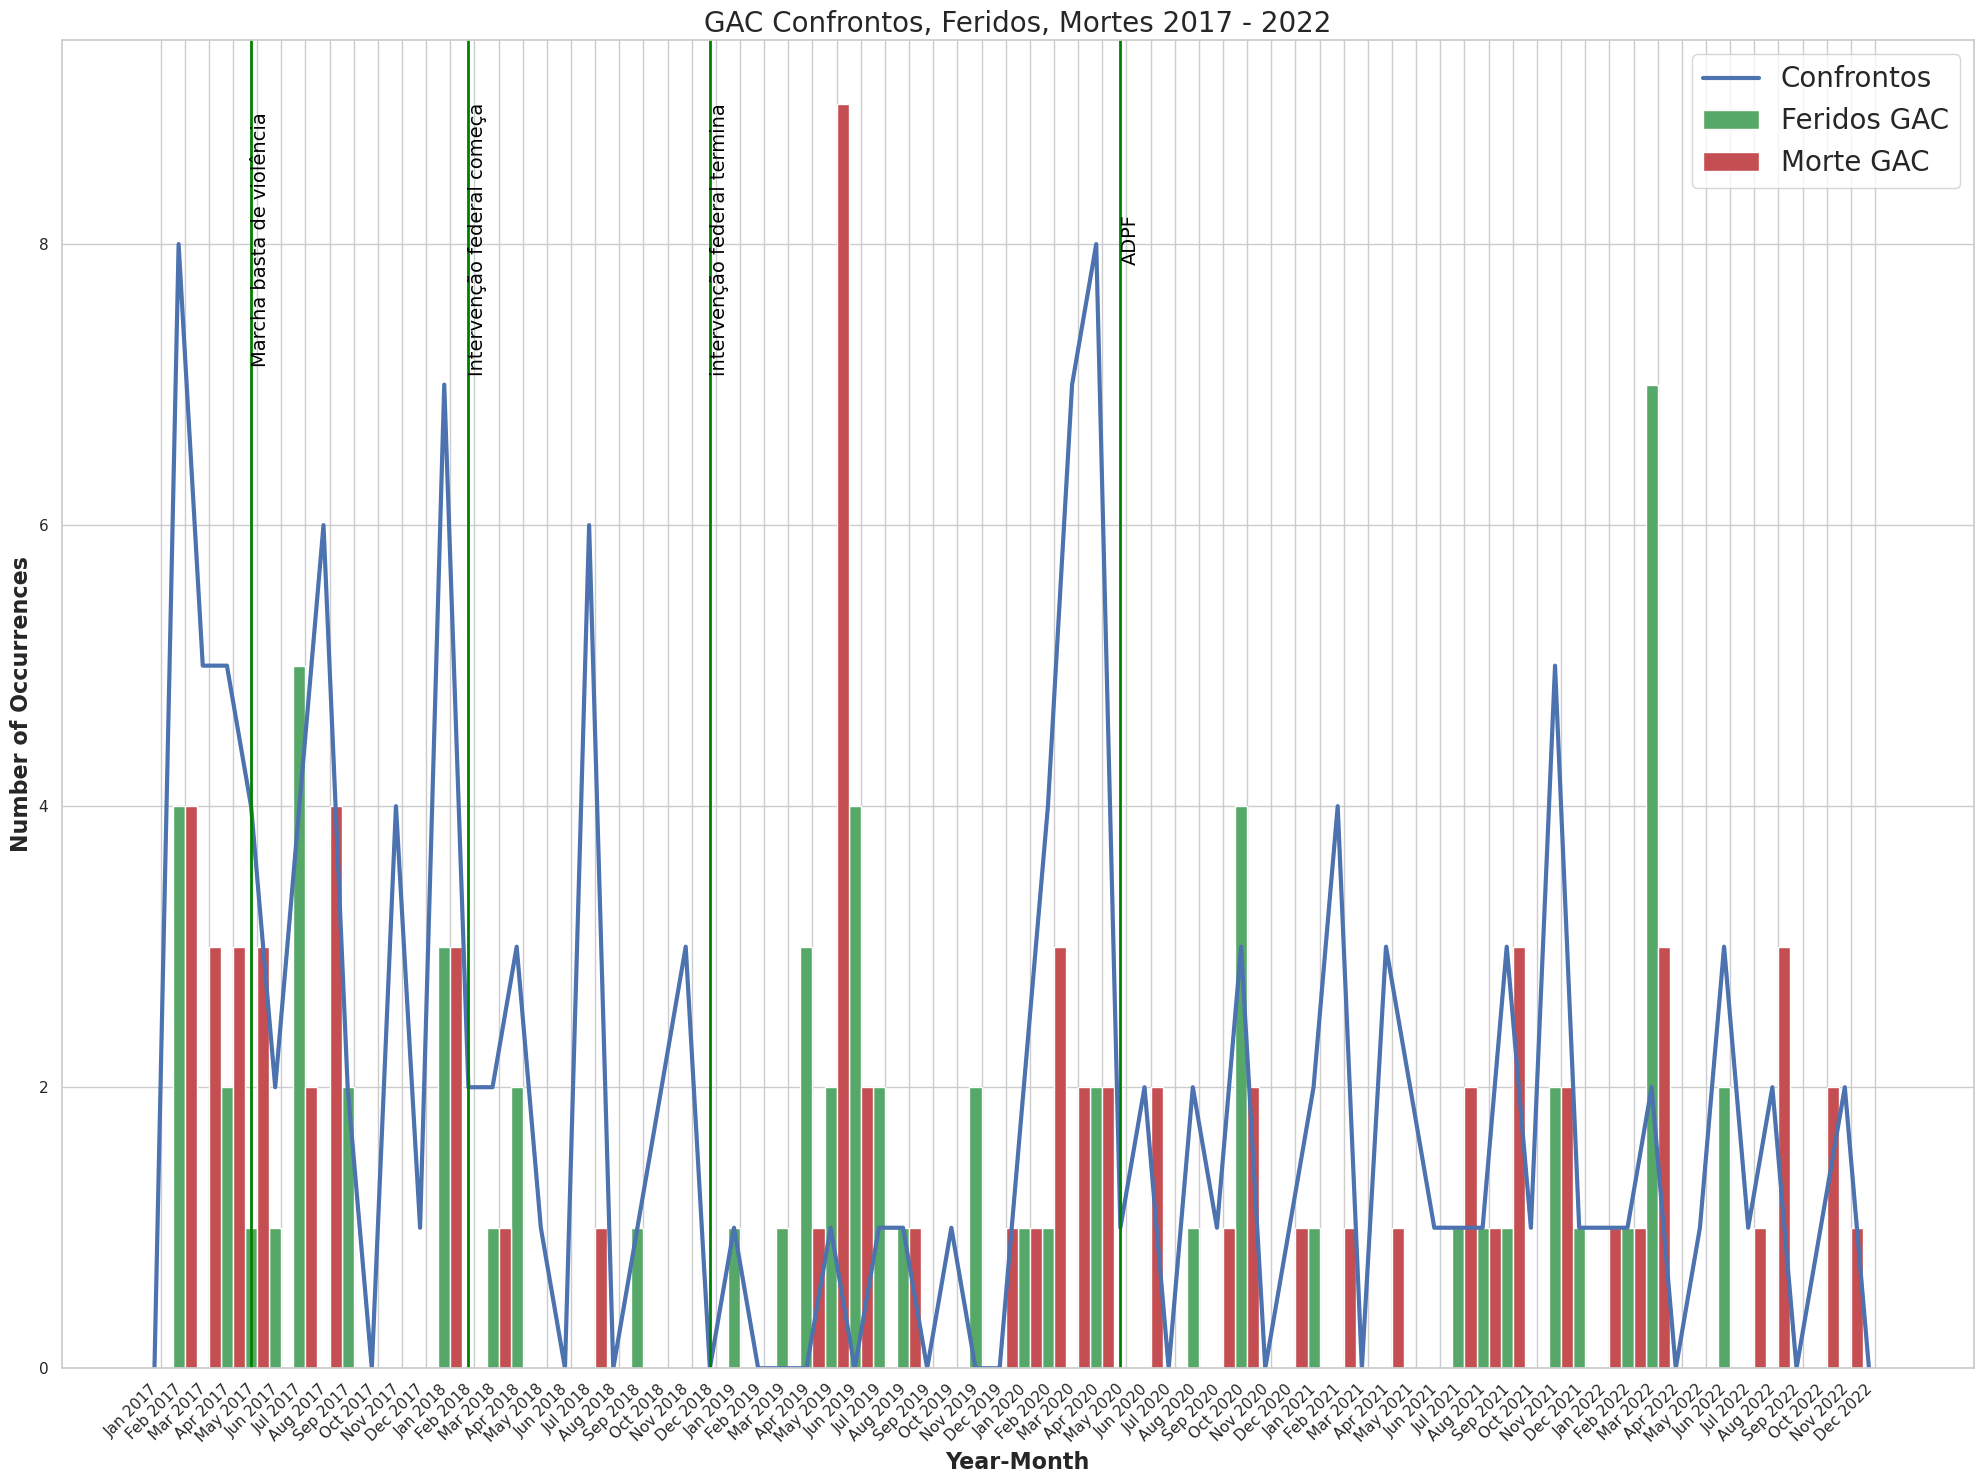

In [38]:
import seaborn as sns

width=25

x = df['yearmo']
y = df['Confronto_GAC']
z = df['feridos_GAC']
k = df['Morte_GAC']

sns.set(style="whitegrid")
sns.color_palette()

fig, ax = plt.subplots(figsize=(20, 15))

# Define the line graphs
ax.plot(x, y, color='b', label='Confrontos', linewidth=3)
ax.set_xlabel('Year-Month', fontweight='bold', fontsize=16)
ax.set_ylabel('Number of Incidents', fontweight='bold', fontsize=16)
ax.tick_params(axis='y')

# Define the two bar graphs
bar_width = 0.5
r1 = np.arange(len(x))
r2 = [n + bar_width for n in r1]

ax.bar(r1, z, color='g', width=bar_width, label='Feridos GAC')
ax.bar(r2, k, color='r', width=bar_width, label='Morte GAC')
for _, row in df.iterrows():
    if pd.isnull(row['event']) or pd.isnull(row['event_date']):
        continue
    plt.axvline(row['event_date'], color='green', linestyle='-', linewidth=2)
    plt.text(
        row['event_date'],
        plt.gca().get_ylim()[1] * 0.85,
        row['event'],
        rotation=90,
        verticalalignment='center',
        fontsize=14,
        color='black'
    )
    
ax.set_ylabel('Number of Occurrences', fontweight='bold', fontsize=16)
ax.set_xticks([r + bar_width/2 for r in range(len(x))])
ax.set_xticklabels(x, rotation=45, ha='right')
ax.legend(fontsize=20)

plt.title('GAC Confrontos, Feridos, Mortes 2017 - 2022', fontsize=20)
plt.tight_layout()

### Another Chart

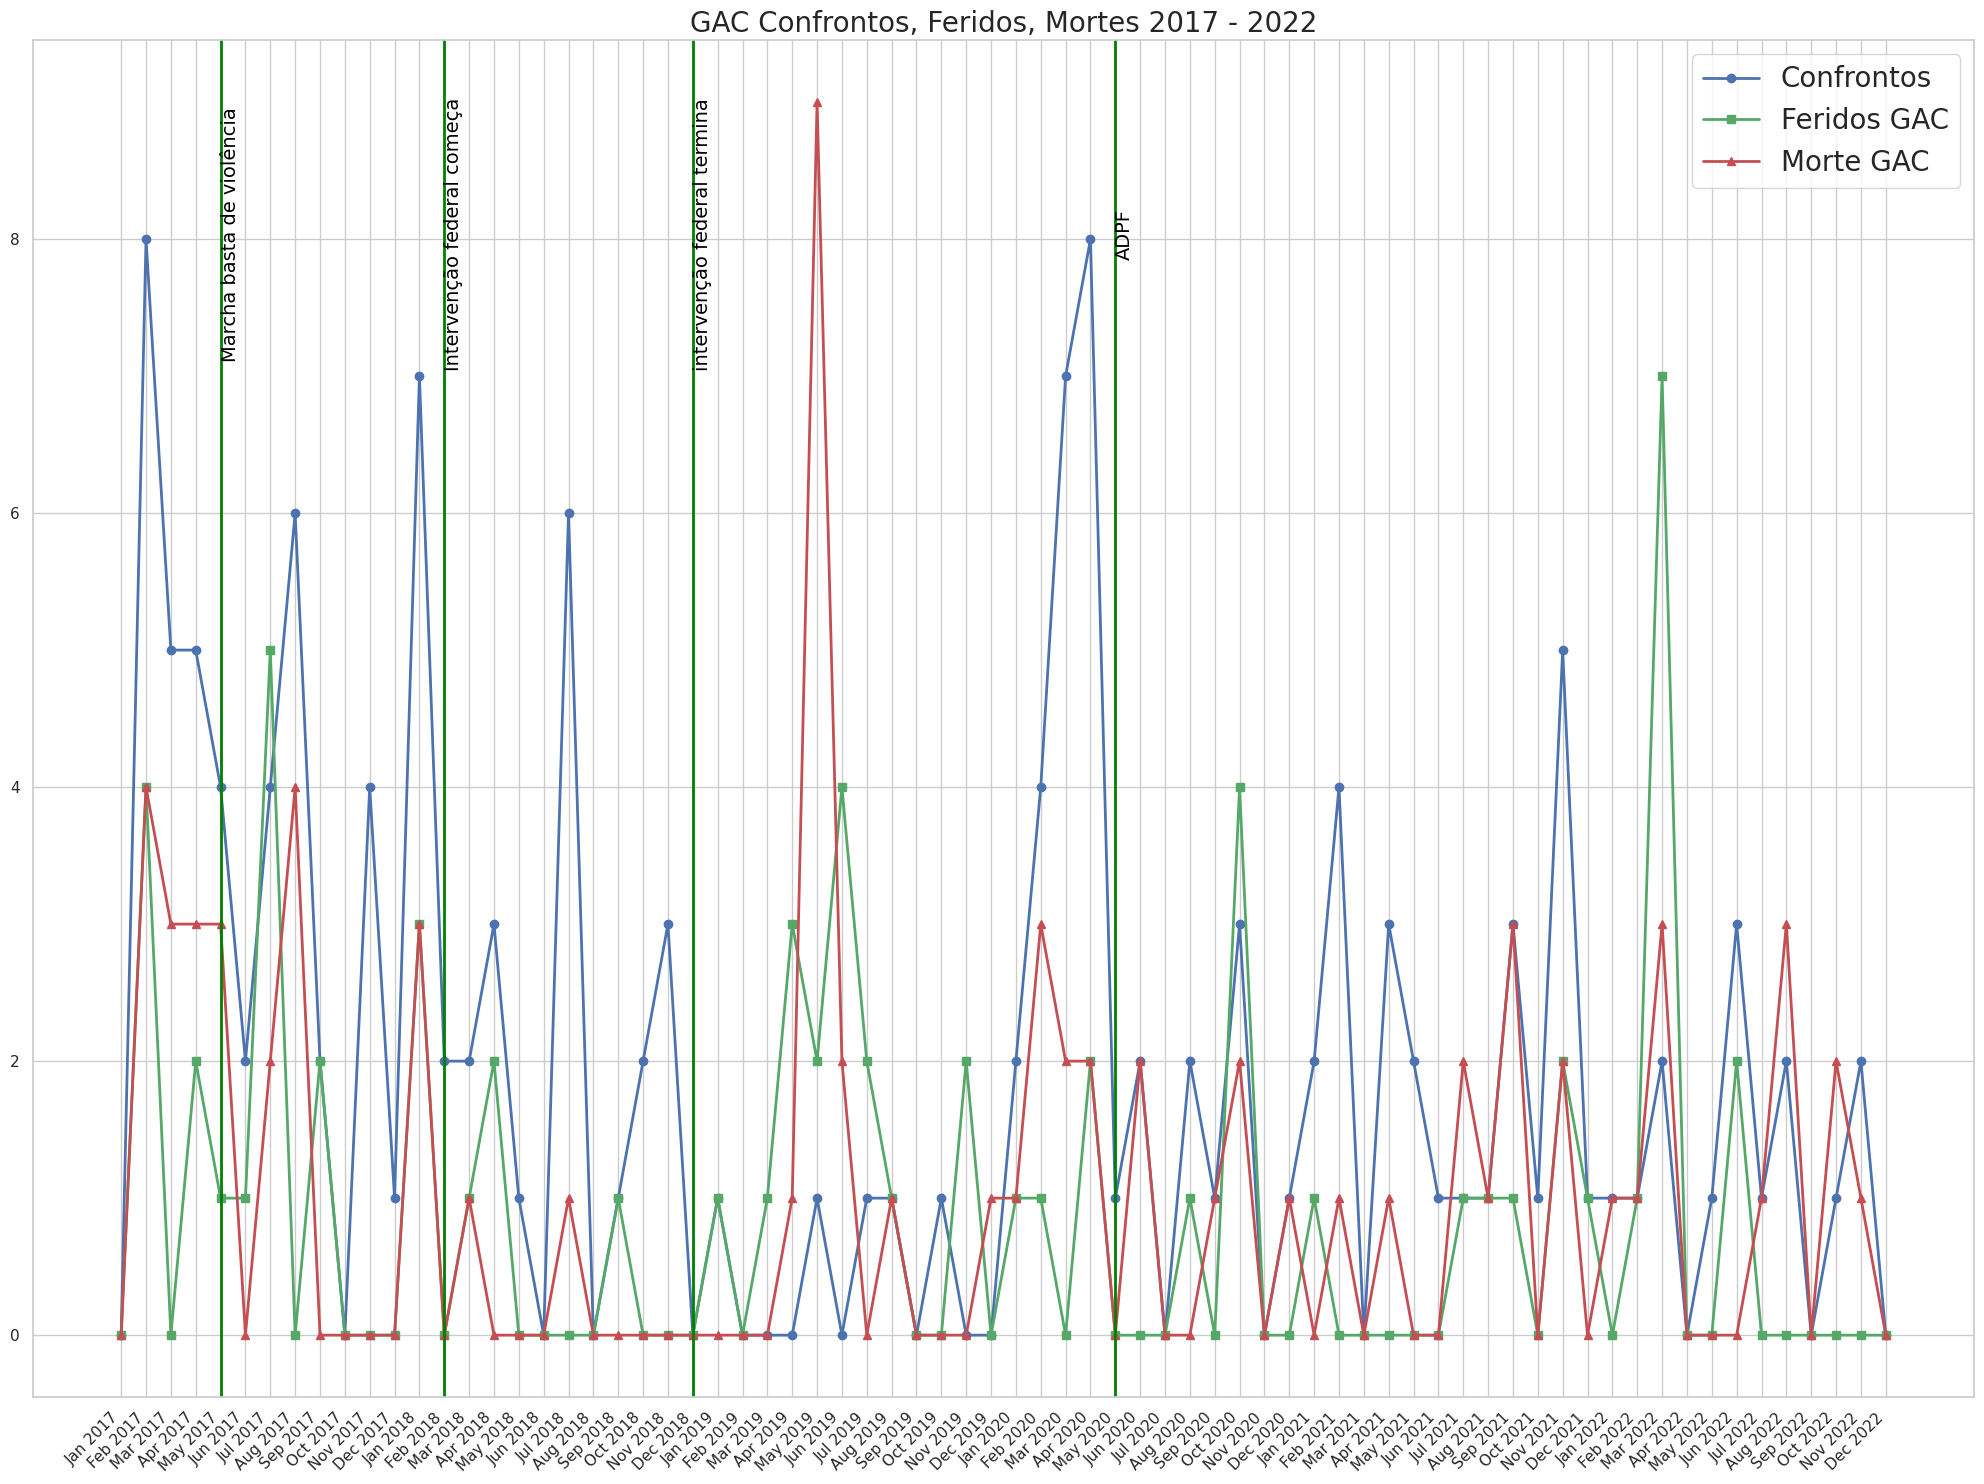

In [39]:
import seaborn as sns

width=25

x = df['yearmo']
y = df['Confronto_GAC']
z = df['feridos_GAC']
k = df['Morte_GAC']

sns.set(style="whitegrid")
sns.color_palette()

fig, ax = plt.subplots(figsize=(20, 15))

# Define three line graphs
ax.plot(x, y, color='b', marker='o', label='Confrontos', linewidth=2)
ax.plot(x, z, color='g', marker='s', label='Feridos GAC', linewidth=2)
ax.plot(x, k, color='r', marker='^', label='Morte GAC', linewidth=2)

for _, row in df.iterrows():
    if pd.isnull(row['event']) or pd.isnull(row['event_date']):
        continue
    plt.axvline(row['event_date'], color='green', linestyle='-', linewidth=2)
    plt.text(
        row['event_date'],
        plt.gca().get_ylim()[1] * 0.85,
        row['event'],
        rotation=90,
        verticalalignment='center',
        fontsize=14,
        color='black'
    )

ax.tick_params(axis='y')
ax.set_xticks(range(len(x)))
ax.set_xticklabels(x, rotation=45, ha='right')

ax.legend(fontsize=20)

plt.title('GAC Confrontos, Feridos, Mortes 2017 - 2022', fontsize=20)
plt.tight_layout()